# Imports

In [11]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from torch import nn
from torchvision import transforms
import torchvision

# Activation Functions

## ReLU

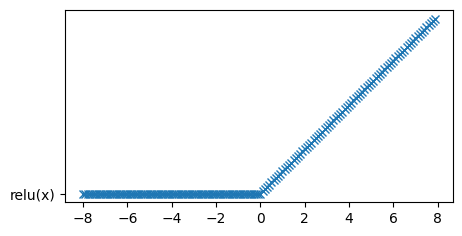

In [8]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
plt.figure(figsize=(5, 2.5))
plt.plot(x.detach().numpy(), y.detach().numpy(), 'x', 'relu(x)')

Plotting the derivative of ReLU based on the value of x

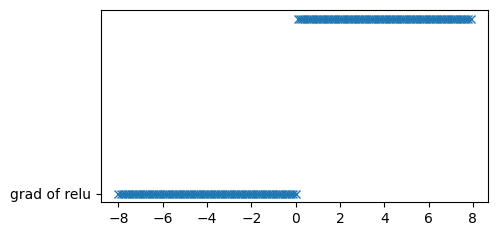

In [9]:
y.backward(torch.ones_like(x), retain_graph=True)
plt.figure(figsize=(5, 2.5))
plt.plot(x.detach(), x.grad, 'x', 'grad of relu')

## Sigmoid Function

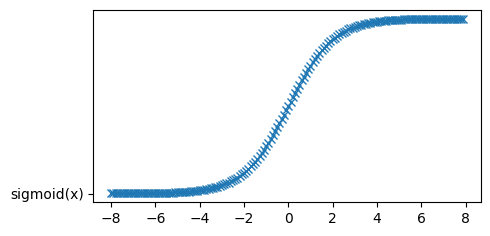

In [10]:
y = torch.sigmoid(x)
plt.figure(figsize=(5, 2.5))
plt.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)')

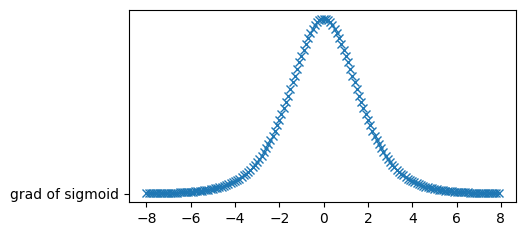

In [11]:
# Clear out previous gradients
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
plt.figure(figsize=(5, 2.5))
plt.plot(x.detach(), x.grad, 'x', 'grad of sigmoid')

## Tanh Function

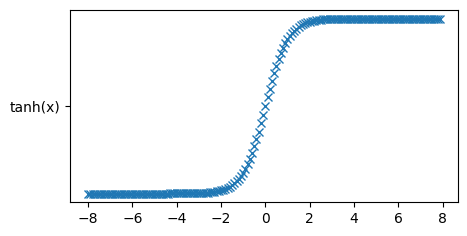

In [12]:
y = torch.tanh(x)
plt.figure(figsize=(5, 2.5))
plt.plot(x.detach(), y.detach(), 'x', 'tanh(x)')

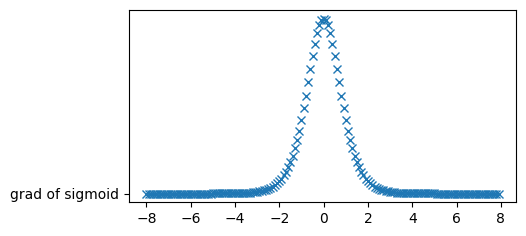

In [13]:
# Clear out previous gradients
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
plt.figure(figsize=(5, 2.5))
plt.plot(x.detach(), x.grad, 'x', 'grad of sigmoid')

# Implementation

In [12]:
class FashionMNIST:
    """The Fashion-MNIST dataset."""
    def __init__(self, batch_size=64, resize=(28, 28)):
        trans = transforms.Compose([transforms.Resize(resize),
                                    transforms.ToTensor()])
        self.root = "/"
        self.batch_size = batch_size
        self.train = torchvision.datasets.FashionMNIST(
            root=self.root, train=True, transform=trans, download=True)
        self.val = torchvision.datasets.FashionMNIST(
            root=self.root, train=False, transform=trans, download=True)

    def text_labels(self, indices):
        """Return text labels."""
        labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
        return [labels[int(i)] for i in indices]

    def get_dataloader(self, train):
        data = self.train if train else self.val
        return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train)
    
    def visualize(self, batch, nrows=1, ncols=8, labels=[]):
        X, y = batch
        if not labels:
            labels = self.text_labels(y)
        plt.figure(figsize=(2 * ncols, 2 * nrows))
        max_imgs = min(X.shape[0], nrows * ncols)
        for i in range(max_imgs):
            plt.subplot(nrows, ncols, i + 1)
            img = X[i].squeeze().numpy()
            plt.imshow(img, cmap='gray')
            plt.title(labels[i])
            plt.axis('off')
        plt.tight_layout()
        plt.show()

In [1]:
def relu(x):
    return torch.where(x > 0, x, torch.zeros_like(x))

In [ ]:
class MLP:
    def __init__(self, num_outputs, num_hiddens, lr):
        self.num_outputs = num_outputs
        self.num_hiddens = num_hiddens
        self.lr = lr
        self.net = nn.Sequential(
            nn.Flatten(),
            nn.LazyLinear(num_hiddens),
            nn.ReLU(),
            nn.LazyLinear(num_outputs)
        )

    def train(self, X, y):
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.SGD(self.net.parameters(), lr=self.lr)
        for epoch in range(10):
            optimizer.zero_grad()
            output = self.net(X)
            loss = criterion(output, y)
            loss.backward()
            optimizer.step()
            print(f'Epoch {epoch + 1}, Loss: {loss.item()}')


In [6]:
model = MLP(num_outputs=10, num_hiddens=256, lr=0.01)

In [13]:
data = FashionMNIST(resize=(32, 32))  
len(data.train), len(data.val)

(60000, 10000)

In [14]:
training_data = data.get_dataloader(train=True)

In [15]:
for X_train, y_train in training_data:
    model.train(X_train, y_train)

Epoch 1, Loss: 2.2950327396392822
Epoch 2, Loss: 2.28277587890625
Epoch 3, Loss: 2.270948886871338
Epoch 4, Loss: 2.2594664096832275
Epoch 5, Loss: 2.2482047080993652
Epoch 6, Loss: 2.2372589111328125
Epoch 7, Loss: 2.2266170978546143
Epoch 8, Loss: 2.216336965560913
Epoch 9, Loss: 2.2062418460845947
Epoch 10, Loss: 2.1963441371917725
Epoch 1, Loss: 2.206146717071533
Epoch 2, Loss: 2.1966469287872314
Epoch 3, Loss: 2.18758225440979
Epoch 4, Loss: 2.1787919998168945
Epoch 5, Loss: 2.170348882675171
Epoch 6, Loss: 2.16221284866333
Epoch 7, Loss: 2.154283285140991
Epoch 8, Loss: 2.146466016769409
Epoch 9, Loss: 2.138770341873169
Epoch 10, Loss: 2.1312458515167236
Epoch 1, Loss: 2.1216399669647217
Epoch 2, Loss: 2.1035995483398438
Epoch 3, Loss: 2.0863137245178223
Epoch 4, Loss: 2.069864273071289
Epoch 5, Loss: 2.0541293621063232
Epoch 6, Loss: 2.0388996601104736
Epoch 7, Loss: 2.0241715908050537
Epoch 8, Loss: 2.0100016593933105
Epoch 9, Loss: 1.9962847232818604
Epoch 10, Loss: 1.98294651